In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [52]:
img0 = cv2.imread("../opencv-np-workshop/data/img/aloeL.jpg")
img1 = cv2.imread("../opencv-np-workshop/data/img/aloeR.jpg")

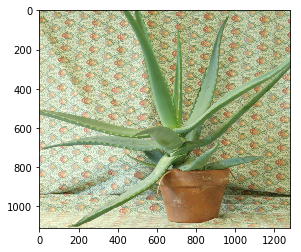

In [46]:
plt.imshow(img1[:,:,::-1])

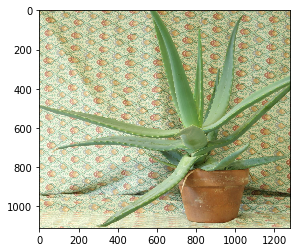

In [47]:
plt.imshow(img0[:,:,::-1])

In [48]:
img0 = cv2.pyrDown(img0) # Downsample for speed
img1 = cv2.pyrDown(img1)

In [55]:
# Use StereoSGBM algorithm to create the disparity map
# PARAMETERS ARE VERY SENSITIVE TO THE IMAGE! TRIAL & ERROR

window_size = 3
min_disp = 16
num_disp = 112-min_disp # Divisible by 16!

stereo = cv2.StereoSGBM_create(
    minDisparity = min_disp,
    blockSize = 16,
    numDisparities = num_disp,
    P1 = 8*3*window_size**2,
    P2 = 32*3*window_size**2,
    disp12MaxDiff = 1,
    uniquenessRatio = 10,
    speckleWindowSize = 100,
    speckleRange = 32    
)

In [56]:
disparity_map = stereo.compute(img0,img1) # Show be (LEFT, RIGHT) (?)

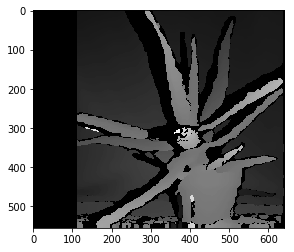

In [51]:
plt.imshow(disparity_map, cmap="gray")

In [29]:
# Save disparity map to use for reconstruction
np.save("../opencv-np-workshop/data/3d/disparity_map.npy", disparity_map)
cv2.imwrite("../opencv-np-workshop/data/3d/img1.png", img1)

True